In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.5


In [3]:
import scipy
scipy.__version__

'1.6.2'

In [4]:
import matplotlib
matplotlib.__version__

'3.4.2'

## Integração Numérica

In [6]:
import numpy as np
np.__version__

'1.20.3'

In [7]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [8]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [9]:
from scipy.integrate import odeint, ode

In [10]:
from pylab import *
%matplotlib inline

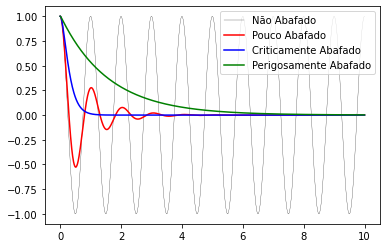

In [11]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

In [12]:
from scipy.fftpack import *

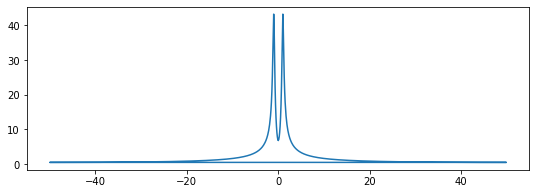

In [13]:
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0]) 

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

## Álgebra Linear

In [14]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

In [15]:
# Resolvendo um sistema de equações lineares
x = solve(A, b)
x

array([ 2., -2.,  9.])

In [16]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.01487177, -0.33365092,  0.14607875])

In [17]:
evecs

array([[-0.78447927, -0.76882733, -0.36181282],
       [-0.28335996,  0.51490847, -0.52716077],
       [-0.5516334 ,  0.37917516,  0.76889076]])

In [18]:
svd(A)

(array([[-0.85517481,  0.5136922 , -0.06925574],
        [-0.21691758, -0.47601778, -0.85226395],
        [-0.47076831, -0.71381188,  0.51850729]]),
 array([1.08465238, 0.3502277 , 0.13021154]),
 array([[-0.53885132, -0.56166883, -0.6278275 ],
        [-0.67505689,  0.73373357, -0.0770275 ],
        [-0.50392206, -0.38231291,  0.77453172]]))

## Otimização

In [19]:
from scipy import optimize

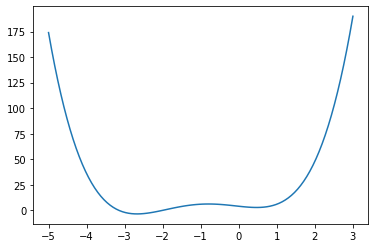

In [20]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [21]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

## Estatística

In [22]:
from scipy import stats

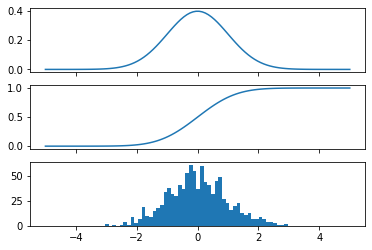

In [23]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [24]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [25]:
# T-test
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(0.26070615823585697, 0.7943459828769299)